Balancing Class

1. Data Loading

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Healthcare-Diabetes.csv")
df

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


2. Data Cleansing

In [3]:
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

3. Preprocesing Data

In [4]:
#Cara 1
df_new = df.copy()
df_new = df_new[["Pregnancies",
                 "Glucose",
                 "BloodPressure",
                 "SkinThickness",
                 "Insulin",
                 "BMI",
                 "DiabetesPedigreeFunction",
                 "Age",
                 "Outcome"
                ]]

In [5]:
df_new

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [6]:
#Cara 2
df_new2 = df.copy()
df_new2.drop(columns=["Id"],inplace=True)

In [7]:
df_new2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [8]:
df_new2["Outcome"].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

Balancing (OVERSAMPLING) 80:20

In [9]:
#masih data asli (bukan data latih)
X = df_new2.drop(columns=["Outcome"]) #fitur
y = df_new2["Outcome"] #kolom

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

#panggil SMOTE
smote = SMOTE(random_state=42)

In [11]:
#spiliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from collections import Counter

#Oversampling dengan SMOTE (hanya pada training data)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Distribusi kelas setelah SMOTE (Oversampling):", Counter(y_train_smote))

Distribusi kelas setelah SMOTE (Oversampling): Counter({0: 1453, 1: 1453})


Balancing (UNDERSAMPLING) 80:20

In [13]:
from imblearn.under_sampling import RandomUnderSampler
undersampling = RandomUnderSampler(random_state=42)

In [14]:
X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train)

In [15]:
print("Distribusi kelas setelah undersampling (Random UnderSampling): ", Counter(y_train_under))

Distribusi kelas setelah undersampling (Random UnderSampling):  Counter({0: 761, 1: 761})


Training Testing ML

In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Buat training KNN

In [80]:
#memuat model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

#melatih model machine Learningnya
model_knn.fit(X_train_smote,y_train_smote)

#Menampilkan uji performa sisi Traning
y_pred_train_KNN = model_knn.predict(X_train_smote)

#Menampilkan uji performa sisi testing
y_pred_test_KNN = model_knn.predict(X_test)

Metriks Evaluasi Model KNN

In [20]:
#menampilkan akurasi sisi training
akurasi_training_knn = accuracy_score(y_train_smote,y_pred_train_KNN)

#menampilkan akurasi sisi testing
akurasi_testing_knn = accuracy_score(y_test,y_pred_test_KNN)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_knn*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_knn*100)

Hasil Akurasinya Trainingnya adalah :  96.1459050240881
Hasil Akurasinya Testingnya adalah :  85.01805054151625


In [52]:
print("Classification report Training")
print(classification_report(y_train_smote,y_pred_train_KNN))

Classification report Trianing
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1453
           1       0.95      0.98      0.96      1453

    accuracy                           0.96      2906
   macro avg       0.96      0.96      0.96      2906
weighted avg       0.96      0.96      0.96      2906



In [53]:
print("Classification report Testing")
print(classification_report(y_test,y_pred_test_KNN))

Classification report Testing
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       363
           1       0.73      0.90      0.80       191

    accuracy                           0.85       554
   macro avg       0.83      0.86      0.84       554
weighted avg       0.87      0.85      0.85       554



In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 

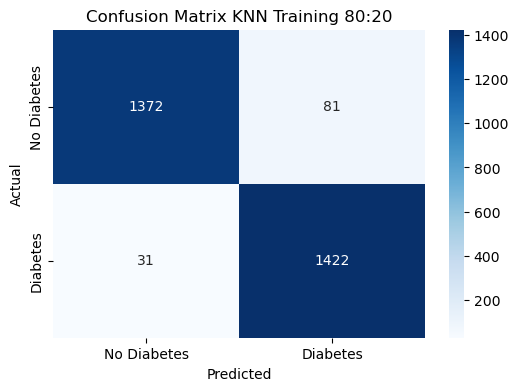

In [55]:
#Confusion Matrix Training
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Training 80:20")
plt.show()

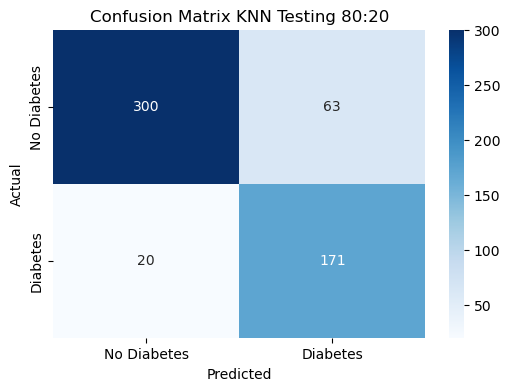

In [56]:
#Confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Testing 80:20")
plt.show()

Balancing (UNDERSAMPLING) 70:30

In [81]:
#spiliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [70]:
undersampling = RandomUnderSampler(random_state=42)

In [71]:
X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train)

In [72]:
print("Distribusi kelas setelah undersampling (Random UnderSampling): ", Counter(y_train_under))

Distribusi kelas setelah undersampling (Random UnderSampling):  Counter({0: 666, 1: 666})


In [74]:
#memuat model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

#melatih model machine Learningnya
model_knn.fit(X_train_smote,y_train_smote)

#Menampilkan uji performa sisi Traning
y_pred_train_KNN = model_knn.predict(X_train_smote)

#Menampilkan uji performa sisi Testing
y_pred_test_KNN = model_knn.predict(X_test)

In [75]:
#menampilkan akurasi sisi training
akurasi_training_knn = accuracy_score(y_train_smote,y_pred_train_KNN)

#menampilkan akurasi sisi testing
akurasi_testing_knn = accuracy_score(y_test,y_pred_test_KNN)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_knn*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_knn*100)

Hasil Akurasinya Trainingnya adalah :  96.1459050240881
Hasil Akurasinya Testingnya adalah :  88.56799037304452


In [76]:
print("Classification report Training")
print(classification_report(y_train_smote,y_pred_train_KNN))

Classification report Training
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1453
           1       0.95      0.98      0.96      1453

    accuracy                           0.96      2906
   macro avg       0.96      0.96      0.96      2906
weighted avg       0.96      0.96      0.96      2906



In [77]:
print("Classification report Testing")
print(classification_report(y_test,y_pred_test_KNN))

Classification report Testing
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       545
           1       0.79      0.92      0.85       286

    accuracy                           0.89       831
   macro avg       0.87      0.89      0.88       831
weighted avg       0.90      0.89      0.89       831



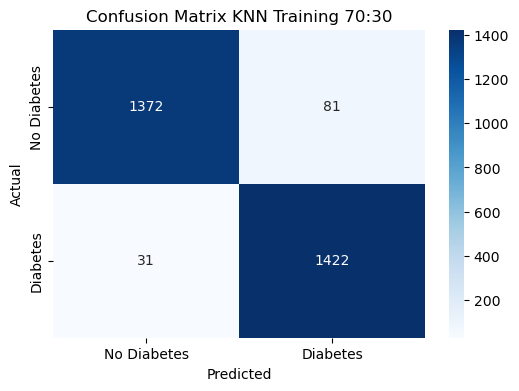

In [78]:
#Confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Training 70:30")
plt.show()

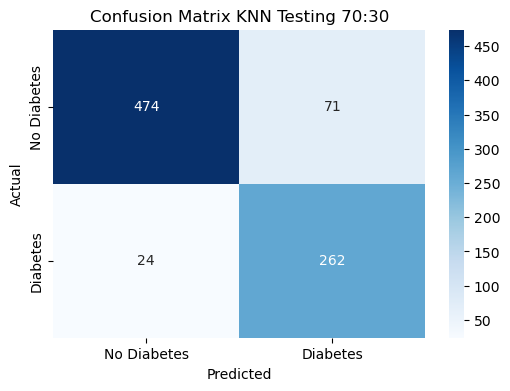

In [79]:
#Confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Testing 70:30")
plt.show()

Balancing (UNDERSAMPLING) 60:40

In [82]:
#spiliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [84]:
undersampling = RandomUnderSampler(random_state=42)

In [85]:
X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train)

In [86]:
print("Distribusi kelas setelah undersampling (Random UnderSampling): ", Counter(y_train_under))

Distribusi kelas setelah undersampling (Random UnderSampling):  Counter({0: 571, 1: 571})


In [87]:
#memuat model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)

#melatih model machine Learningnya
model_knn.fit(X_train_smote,y_train_smote)

#Menampilkan uji performa sisi Traning
y_pred_train_KNN = model_knn.predict(X_train_smote)

#Menampilkan uji performa sisi Testing
y_pred_test_KNN = model_knn.predict(X_test)

In [88]:
#menampilkan akurasi sisi training
akurasi_training_knn = accuracy_score(y_train_smote,y_pred_train_KNN)

#menampilkan akurasi sisi testing
akurasi_testing_knn = accuracy_score(y_test,y_pred_test_KNN)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_knn*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_knn*100)

Hasil Akurasinya Trainingnya adalah :  96.1459050240881
Hasil Akurasinya Testingnya adalah :  90.34296028880865


In [89]:
print("Classification report Trianing")
print(classification_report(y_train_smote,y_pred_train_KNN))

Classification report Trianing
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1453
           1       0.95      0.98      0.96      1453

    accuracy                           0.96      2906
   macro avg       0.96      0.96      0.96      2906
weighted avg       0.96      0.96      0.96      2906



In [ ]:
print("Classification report Testing")
print(classification_report(y_test,y_pred_test_KNN))

In [90]:
print("Classification report Testing")
print(classification_report(y_test,y_pred_test_KNN))

Classification report Testing
              precision    recall  f1-score   support

           0       0.96      0.89      0.92       727
           1       0.82      0.93      0.87       381

    accuracy                           0.90      1108
   macro avg       0.89      0.91      0.90      1108
weighted avg       0.91      0.90      0.90      1108



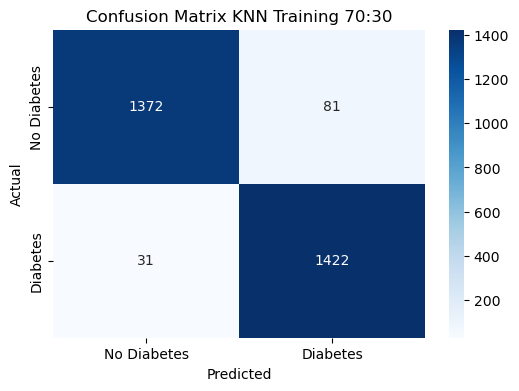

In [91]:
#Confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Training 70:30")
plt.show()

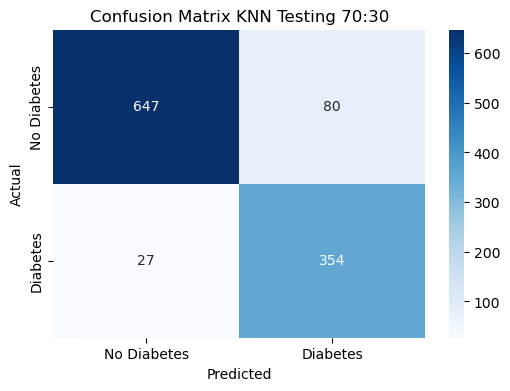

In [92]:
#Confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_KNN), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix KNN Testing 70:30")
plt.show()

Metrik Naive Bayes

In [57]:
from sklearn.naive_bayes import GaussianNB

Model Training NAIVE BAYES 80:20

In [58]:
#Muat model
model_nb = GaussianNB()

#Melatih model Machine Learningnya
model_nb.fit(X_train_smote,y_train_smote)

#Menampilkan uji performa sisi Training
y_pred_train_nb = model_nb.predict(X_train_smote)

#Menampilkan uji performa sisi Testing
y_pred_test_nb = model_nb.predict(X_test)

Metriks Evaluasi NB

In [25]:
#menampilkan akurasi sisi training
akurasi_training_nb = accuracy_score(y_train_smote,y_pred_train_nb)

#menampilkan akurasi sisi testing
akurasi_testing_nb = accuracy_score(y_test,y_pred_test_nb)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_nb*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_nb*100)

Hasil Akurasinya Trainingnya adalah :  73.81280110117
Hasil Akurasinya Testingnya adalah :  74.18772563176896


In [26]:
print("Klasifikasi Report NB (Training)")
print(classification_report(y_train_smote,y_pred_train_nb))

Klasifikasi Report NB (Training)
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1453
           1       0.77      0.68      0.72      1453

    accuracy                           0.74      2906
   macro avg       0.74      0.74      0.74      2906
weighted avg       0.74      0.74      0.74      2906



In [27]:
print("Klasifikasi Report NB (Testing)")
print(classification_report(y_test,y_pred_test_nb))

Klasifikasi Report NB (Testing)
              precision    recall  f1-score   support

           0       0.83      0.76      0.79       363
           1       0.61      0.70      0.65       191

    accuracy                           0.74       554
   macro avg       0.72      0.73      0.72       554
weighted avg       0.75      0.74      0.75       554



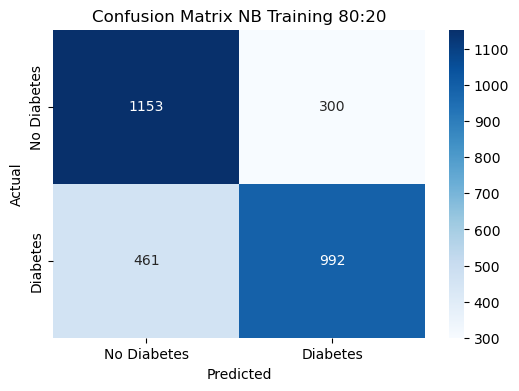

In [60]:
#Confusion Matrix Training
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Training 80:20")
plt.show()

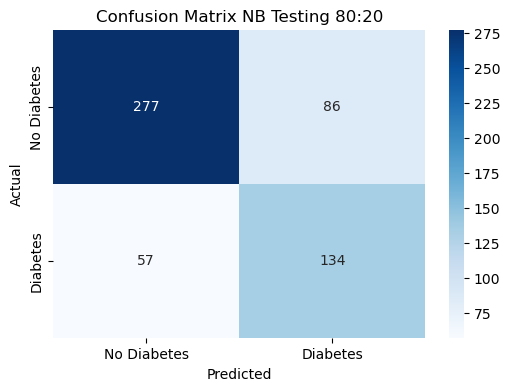

In [63]:
#Confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Testing 80:20")
plt.show()

Model Training NAIVE BAYES 70:30

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
undersampling = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train)
print("Distribusi kelas setelah undersampling (Random UnderSampling): ", Counter(y_train_under))

Distribusi kelas setelah undersampling (Random UnderSampling):  Counter({0: 666, 1: 666})


In [94]:
#Muat model
model_nb= GaussianNB()

#Melatih model machine Learningnya
model_nb.fit(X_train_smote,y_train_smote)

#Menampilkan uji peforma sisi Traning
y_pred_train_nb = model_nb.predict(X_train_smote)

#Menampilkan uji peforma sisi testing
y_pred_test_nb = model_nb.predict(X_test)

In [95]:
#menampilkan akurasi sisi training
akurasi_training_nb = accuracy_score(y_train_smote,y_pred_train_nb)

#menampilkan akurasi sisi testing
akurasi_testing_nb = accuracy_score(y_test,y_pred_test_nb)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_nb*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_nb*100)

Hasil Akurasinya Trainingnya adalah :  73.81280110117
Hasil Akurasinya Testingnya adalah :  73.76654632972323


In [96]:
print("Classification report Trianing NB")
print(classification_report(y_train_smote,y_pred_train_nb))

Classification report Trianing NB
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1453
           1       0.77      0.68      0.72      1453

    accuracy                           0.74      2906
   macro avg       0.74      0.74      0.74      2906
weighted avg       0.74      0.74      0.74      2906



In [97]:
print("Classification report Testing NB")
print(classification_report(y_test,y_pred_test_nb))

Classification report Testing NB
              precision    recall  f1-score   support

           0       0.81      0.78      0.80       545
           1       0.61      0.66      0.63       286

    accuracy                           0.74       831
   macro avg       0.71      0.72      0.71       831
weighted avg       0.74      0.74      0.74       831



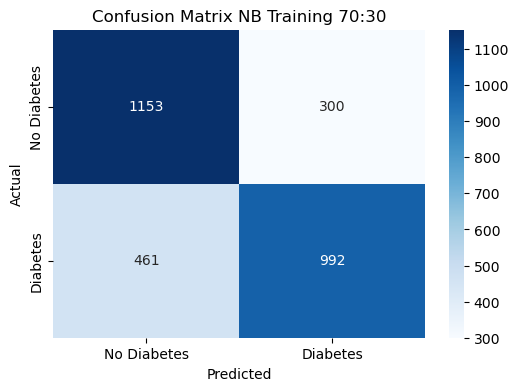

In [99]:
#Confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Training 70:30")
plt.show()

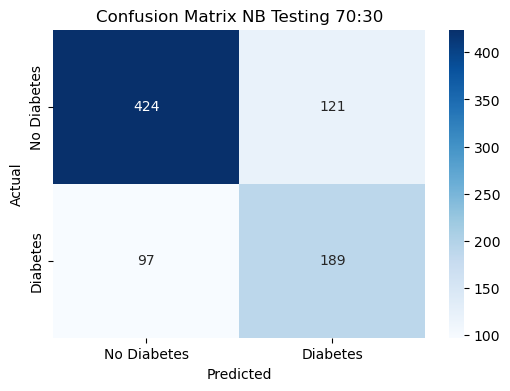

In [106]:
#confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Testing 70:30")
plt.show()

Model Training NAIVE BAYES 60:40

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
undersampling = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train)
print("Distribusi kelas setelah undersampling (Random UnderSampling): ", Counter(y_train_under))

Distribusi kelas setelah undersampling (Random UnderSampling):  Counter({0: 571, 1: 571})


In [111]:
#Muat model
model_nb= GaussianNB()

#Melatih model machine Learningnya
model_nb.fit(X_train_smote,y_train_smote)

#Menampilkan uji peforma sisi Traning
y_pred_train_nb = model_nb.predict(X_train_smote)

#Menampilkan uji peforma sisi testing
y_pred_test_nb = model_nb.predict(X_test)

In [112]:
#Menampilkan akurasi sisi training
akurasi_training_nb = accuracy_score(y_train_smote,y_pred_train_nb)

#Menampilkan akurasi sisi testing
akurasi_testing_nb = accuracy_score(y_test,y_pred_test_nb)

print("Hasil Akurasinya Trainingnya adalah : ", akurasi_training_nb*100)
print("Hasil Akurasinya Testingnya adalah : ",akurasi_testing_nb*100)

Hasil Akurasinya Trainingnya adalah :  73.81280110117
Hasil Akurasinya Testingnya adalah :  73.73646209386283


In [113]:
print("Classification report Training NB")
print(classification_report(y_train_smote,y_pred_train_nb))

Classification report Training NB
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1453
           1       0.77      0.68      0.72      1453

    accuracy                           0.74      2906
   macro avg       0.74      0.74      0.74      2906
weighted avg       0.74      0.74      0.74      2906



In [114]:
print("Classification report Testing NB")
print(classification_report(y_test,y_pred_test_nb))

Classification report Testing NB
              precision    recall  f1-score   support

           0       0.82      0.77      0.79       727
           1       0.61      0.67      0.64       381

    accuracy                           0.74      1108
   macro avg       0.71      0.72      0.72      1108
weighted avg       0.74      0.74      0.74      1108



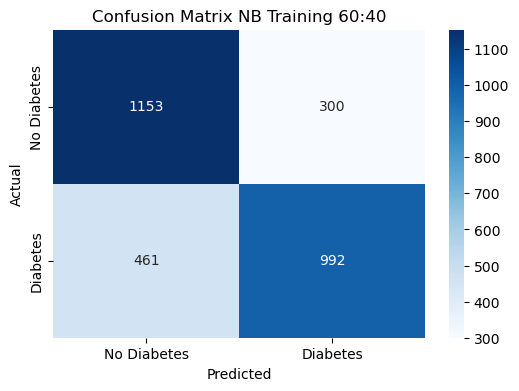

In [115]:
#Confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Training 60:40")
plt.show()

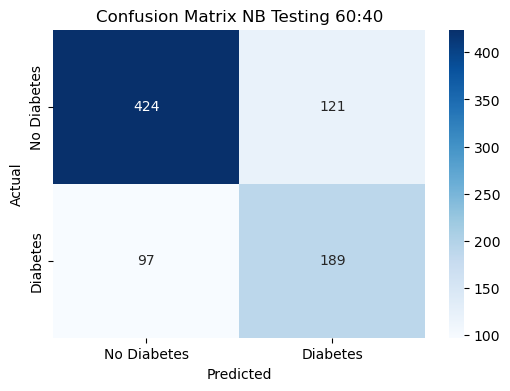

In [107]:
#Confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_nb), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix NB Testing 60:40")
plt.show()

Random Forest 80:20

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
#memuat
model_rfc = RandomForestClassifier(n_estimators=100,random_state=42)

#melatih
model_rfc.fit(X_train_smote, y_train_smote)

#mengitung training
y_pred_train_rfc = model_rfc.predict(X_train_smote)

#mengitung training
y_pred_test_rfc = model_rfc.predict(X_test)

Metriks Evaluasi RFC

In [37]:
#menampilkan akurasi sisi training
akurasi_training_rfc = accuracy_score(y_train_smote,y_pred_train_rfc)

#menampilkan akurasi sisi testing
akurasi_testing_rfc = accuracy_score(y_test,y_pred_test_rfc)

print("Hasil Akurasi Training RFC adalah : ", akurasi_training_rfc*100)
print("Hasil Akurasi Testing RFC adalah : ",akurasi_testing_rfc*100)

Hasil Akurasi Training RFC adalah :  100.0
Hasil Akurasi Testing RFC adalah :  99.63898916967509


In [38]:
print("Klasifikasi Report RFC (Training)")
print(classification_report(y_train_smote,y_pred_train_rfc))

Klasifikasi Report RFC (Training)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1453
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      2906
   macro avg       1.00      1.00      1.00      2906
weighted avg       1.00      1.00      1.00      2906



In [39]:
print("Klasifikasi Report RFC (Testing)")
print(classification_report(y_test,y_pred_test_rfc))

Klasifikasi Report RFC (Testing)
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       1.00      0.99      0.99       191

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554



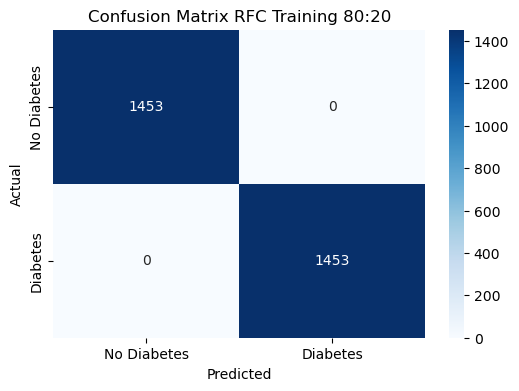

In [40]:
#confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Training 80:20")
plt.show()

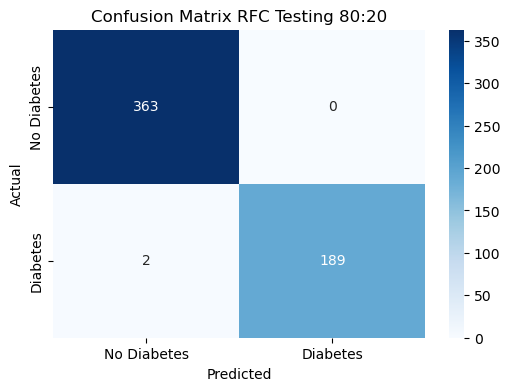

In [41]:
#confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Testing 80:20")
plt.show()

Random Forest 70:30

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
undersampling = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train)
print("Distribusi kelas setelah undersampling (Random UnderSampling): ", Counter(y_train_under))

Distribusi kelas setelah undersampling (Random UnderSampling):  Counter({0: 666, 1: 666})


In [117]:
#memuat
model_rfc = RandomForestClassifier(n_estimators=100,random_state=42)

#melatih
model_rfc.fit(X_train_smote, y_train_smote)

#menghitung traning
y_pred_train_rfc = model_rfc.predict(X_train_smote)

#menghitung testing
y_pred_test_rfc = model_rfc.predict(X_test)

In [118]:
#menampilkan akurasi sisi training
akurasi_training_rfc = accuracy_score(y_train_smote,y_pred_train_rfc)

#menampilkan akurasi sisi testing
akurasi_testing_rfc = accuracy_score(y_test,y_pred_test_rfc)

print("Hasil Akurasinya Trainingnya RFC adalah : ", akurasi_training_rfc*100)
print("Hasil Akurasinya Testingnya RFC adalah : ",akurasi_testing_rfc*100)

Hasil Akurasinya Trainingnya RFC adalah :  100.0
Hasil Akurasinya Testingnya RFC adalah :  99.75932611311673


In [121]:
print("Classification report Training RFC")
print(classification_report(y_train_smote,y_pred_train_rfc))

Classification report Training RFC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1453
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      2906
   macro avg       1.00      1.00      1.00      2906
weighted avg       1.00      1.00      1.00      2906



In [122]:
print("Classification report Testing RFC")
print(classification_report(y_test,y_pred_test_rfc))

Classification report Testing RFC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       545
           1       1.00      0.99      1.00       286

    accuracy                           1.00       831
   macro avg       1.00      1.00      1.00       831
weighted avg       1.00      1.00      1.00       831



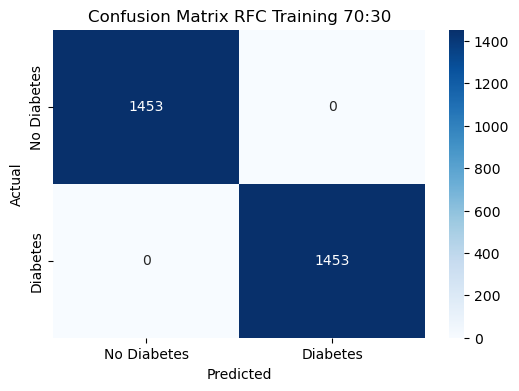

In [123]:
#Confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Training 70:30")
plt.show()

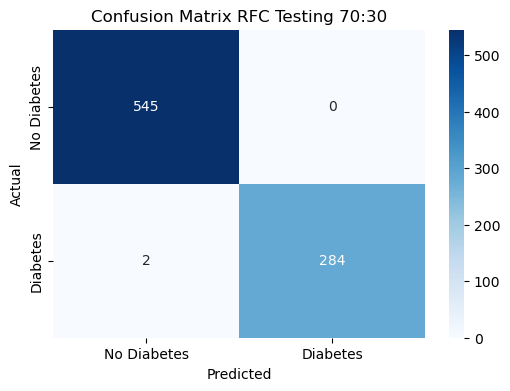

In [124]:
#Confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Testing 70:30")
plt.show()

Random Forest 60:40

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
undersampling = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampling.fit_resample(X_train, y_train)
print("Distribusi kelas setelah undersampling (Random UnderSampling): ", Counter(y_train_under))

Distribusi kelas setelah undersampling (Random UnderSampling):  Counter({0: 571, 1: 571})


In [126]:
#memuat
model_rfc = RandomForestClassifier(n_estimators=100,random_state=42)

#melatih
model_rfc.fit(X_train_smote, y_train_smote)

#menghitung traning
y_pred_train_rfc = model_rfc.predict(X_train_smote)

#menghitung testing
y_pred_test_rfc = model_rfc.predict(X_test)

In [127]:
#menampilkan akurasi sisi training
akurasi_training_rfc = accuracy_score(y_train_smote,y_pred_train_rfc)

#menampilkan akurasi sisi testing
akurasi_testing_rfc = accuracy_score(y_test,y_pred_test_rfc)

print("Hasil Akurasinya Trainingnya RFC adalah : ", akurasi_training_rfc*100)
print("Hasil Akurasinya Testingnya RFC adalah : ",akurasi_testing_rfc*100)

Hasil Akurasinya Trainingnya RFC adalah :  100.0
Hasil Akurasinya Testingnya RFC adalah :  99.81949458483754


In [128]:
print("Classification report Training RFC")
print(classification_report(y_train_smote,y_pred_train_rfc))

Classification report Training RFC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1453
           1       1.00      1.00      1.00      1453

    accuracy                           1.00      2906
   macro avg       1.00      1.00      1.00      2906
weighted avg       1.00      1.00      1.00      2906



In [129]:
print("Classification report Testing RFC")
print(classification_report(y_test,y_pred_test_rfc))

Classification report Testing RFC
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       727
           1       1.00      0.99      1.00       381

    accuracy                           1.00      1108
   macro avg       1.00      1.00      1.00      1108
weighted avg       1.00      1.00      1.00      1108



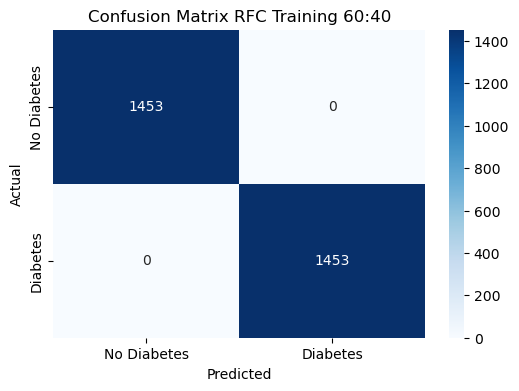

In [130]:
#Confusion Matrix Training
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_train_smote, y_pred_train_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Training 60:40")
plt.show()

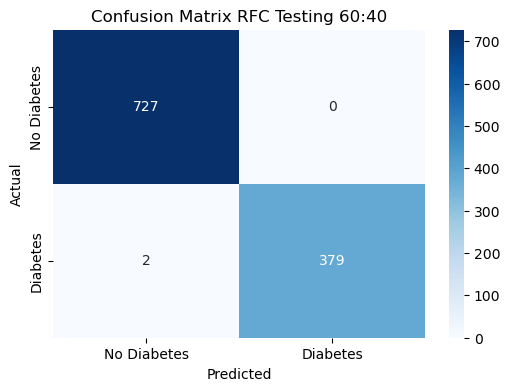

In [131]:
#Confusion Matrix Testing
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_test_rfc), annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RFC Testing 60:40")
plt.show()

Model random Forest Classifier adalah model terbaik untuk melakukan klasifikasi Diebetes pada dataset yang diberikan.


Dengan Nilai akurasi bernilai 99.6 % dibandingkan dengan KNN yang mendapatkan akurasi sebesar 85% dfan naive bayes sebsar 75%.


Dari tingkat kesalahan model dapat kita lihat pada confusion matrix (testing) bahwa ketika RANDOM FOREST CLASIFIER diuji tingkat kesalahannya hanya gagal memprediksi 2 butir data pada kelas DIABETES dari 554 data yang diberikan untuk di UJI.

3. CARA SIMPAN MODEL

In [42]:
import joblib

joblib.dump(model_rfc, "model_diabet_rfc.joblib")

['model_diabet_rfc.joblib']

In [43]:
import pickle
with open('model_rfc.pkl', 'wb') as f:
    pickle.dump(model_rfc, f)

4. CARA MEMUAT MODEL

In [44]:
muat_model = joblib.load("model_diabet_rfc.joblib")

In [46]:
#Memuat model yang telah disimpan
with open('model_rfc.pkl', 'rb') as f:
    model = pickle.load(f)

5. Memprediksi Data Baru (Program Prediksi)

In [47]:
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [48]:
def prediksi_diabetes(model):
    print("=== Silahkan Masukan data pasien ===")
    Pregnancies = int(input("Masukan Pregnancies : "))
    Glucose = int(input("Masukan Kadar Glukosa : "))
    BloodPressure = int(input("Masukan Tekanan Darah : "))
    SkinThickness = int(input("Masukan Ketebalan Kulit : "))
    Insulin = int(input("Masukan Kadar insulin : "))
    BMI = float(input("Masukan BMI pasien : "))
    DiabetesPedigreeFunction = float(input("Masukan DPF pasien : "))
    Age= int(input("Masukan Umur pasien : "))
    
    data_baru = np.array([Pregnancies,
                          Glucose,
                          BloodPressure,
                          SkinThickness,
                          Insulin,
                          BMI,
                          DiabetesPedigreeFunction,
                          Age])
    
    data_baru = data_baru.reshape(1,-1)
    
    prediksi_baru = model.predict(data_baru) 
    if prediksi_baru ==1:
        print(" Pasien terkena Diabetes")
    else:
        print("Pasien Tidak terkena diabtes")

In [51]:
prediksi_diabetes(model_rfc)

=== Silahkan Masukan data pasien ===


Masukan Pregnancies :  10
Masukan Kadar Glukosa :  10
Masukan Tekanan Darah :  10
Masukan Ketebalan Kulit :  10
Masukan Kadar insulin :  10
Masukan BMI pasien :  10
Masukan DPF pasien :  10
Masukan Umur pasien :  20


Pasien Tidak terkena diabtes


outcome 1 --> Diabet

outcome 0 --> Tidak Diabet